### Access libraries that will be used

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from termcolor import colored

### Load file into data frame and inspect for adequacy

In [2]:
pd.set_option('display.max_rows', None)
magic=pd.read_csv(r'p:\\stats.csv')
magic.head()

,FirstName,LastName,Age,Pos,Date,Tm,H/A,Opp,Outcome,GmSc,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
0,Nikola,Vucevic,30-084,C,1/16/2021,ORL,@,BRK,L,33.1,...,4,6,10,7,5,0,4,4,34,18.5
1,Nikola,Vucevic,30-066,C,12/29/2020,ORL,@,OKC,W,27.9,...,3,7,10,5,1,0,1,0,28,13.7
2,Nikola,Vucevic,30-077,C,1/9/2021,ORL,@,DAL,L,26.7,...,3,12,15,2,2,0,0,3,30,14.5
3,Nikola,Vucevic,30-070,C,1/2/2021,ORL,NaN,OKC,L,25.2,...,2,11,13,2,0,0,1,1,30,13.0
4,Nikola,Vucevic,30-072,C,1/4/2021,ORL,NaN,CLE,W,24.1,...,2,6,8,2,2,3,0,0,23,18.8


In [3]:
magic.tail()

,FirstName,LastName,Age,Pos,Date,Tm,H/A,Opp,Outcome,GmSc,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,BPM
139,Mohamed,Bamba,22-239,C,1/6/2021,ORL,NaN,CLE,W,-1.9,...,0,1,1,0,0,0,0,2,0,-37.7
140,Michael,Carter-Williams,29-086,G,1/4/2021,ORL,NaN,CLE,W,-2.1,...,1,0,1,3,0,1,2,2,0,-11.8
141,Gary,Clark,26-053,F,1/8/2021,ORL,@,HOU,L,-2.6,...,0,4,4,0,0,1,2,1,0,-15.8
142,Gary,Clark,26-063,F,1/18/2021,ORL,@,NYK,L,-2.6,...,0,2,2,0,0,1,0,1,0,NaN
143,Dwayne,Bacon,25-141,G,1/18/2021,ORL,@,NYK,L,-4.5,...,0,1,1,1,0,0,1,5,2,NaN


### Display data using histogram, swarmplot, and boxplot

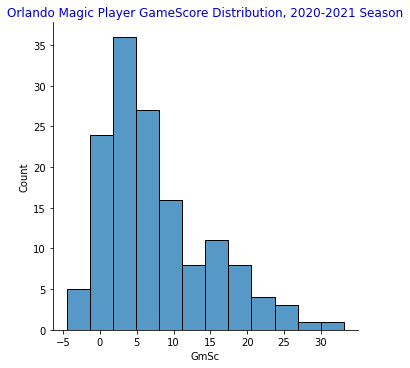

In [4]:
sns.displot(magic['GmSc'])
plt.title("Orlando Magic Player GameScore Distribution, 2020-2021 Season", color='mediumblue')
plt.show()

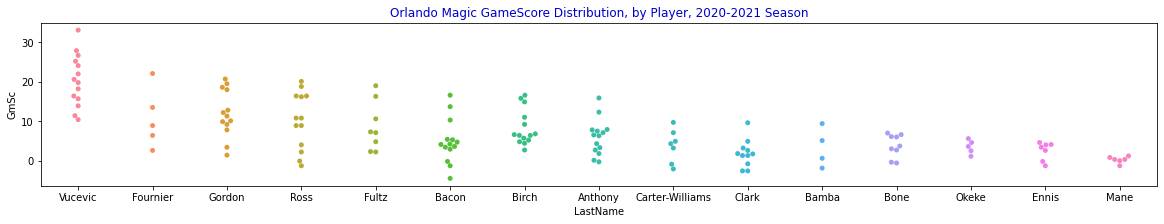

In [5]:
fig, ax = plt.subplots(figsize=(20,3))
sns.swarmplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Player, 2020-2021 Season", color='mediumblue')
plt.show()

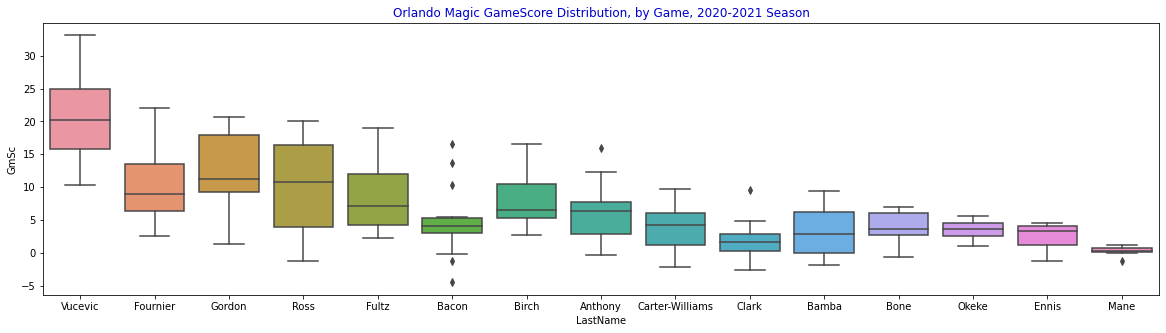

In [6]:
fig, ax = plt.subplots(figsize=(20,5))
sns.boxplot(x="LastName", y="GmSc", data=magic)
plt.title("Orlando Magic GameScore Distribution, by Game, 2020-2021 Season", color='mediumblue')
plt.show()

GameScore versus Minutes Played, by Player


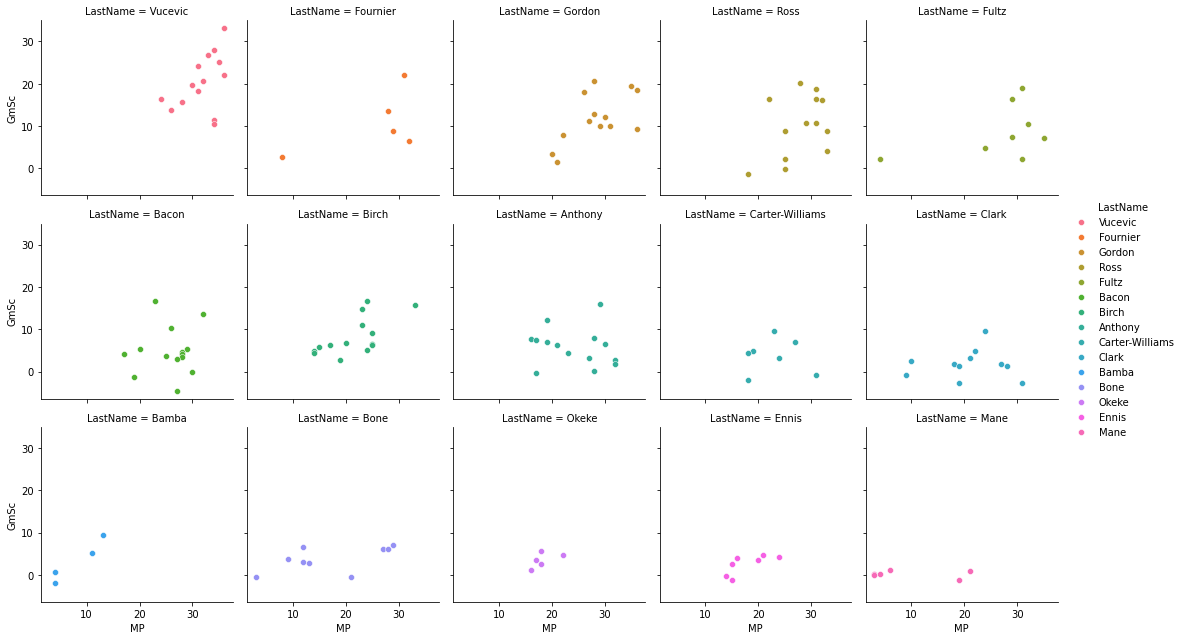

In [7]:
grid = sns.FacetGrid(magic, col = 'LastName', hue = 'LastName', col_wrap=5)
grid.map(sns.scatterplot, 'MP', 'GmSc')
grid.add_legend()
print ("\033[1m"+(colored("GameScore versus Minutes Played, by Player", 'blue'))+"\033[0m")
plt.show() 
# Minutes played on x-axis, GameScore on y-axis

C:\Software\WPy64-3860\python-3.8.6.amd64\lib\site-packages\seaborn\axisgrid.py:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set(**kwargs)


GameScore versus Date Game Played, by GmSc Rank


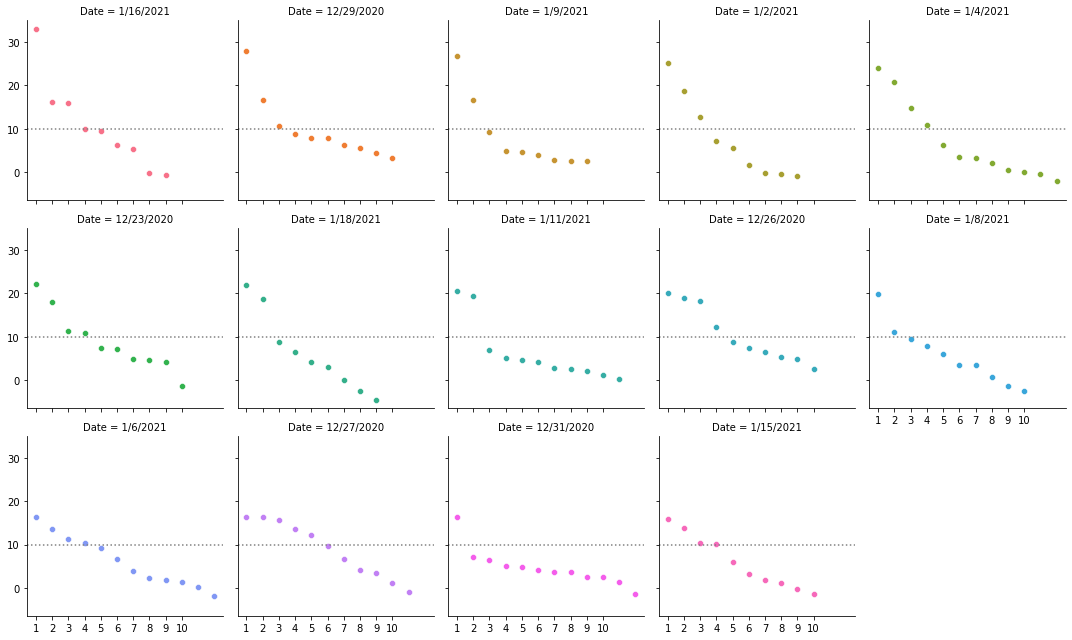

In [8]:
grid = sns.FacetGrid(magic, col = 'Date', hue = 'Date', col_wrap=5)
grid.map(sns.scatterplot, 'LastName', 'GmSc')
grid.set(xlabel="Player", ylabel="GameScore")
grid.set(xticklabels=[1,2,3,4,5,6,7,8,9,10,11])
grid.map(plt.axhline, y=10, ls=":", c=".5")
print ("\033[1m"+(colored("GameScore versus Date Game Played, by GmSc Rank", 'blue'))+"\033[0m")
plt.show() 
# x-axis shows highest GmSc on left, lowest on right for each game. Games ordered by highest game score (in the #1 position on x-axis)
# GmSc of >= 10 are considered above average performace. Points above the dashed line are 'above average'performances.

### Calculate each player's average gamescore, standard dev., and quartiles

In [9]:
print ("\033[1m"+(colored("Descriptive Statistics for GameScore, by Player", 'blue'))+"\033[0m")
magic[['LastName','GmSc']].\
groupby(['LastName'], as_index=True).describe()

Descriptive Statistics for GameScore, by Player


GmSc                                                        
                count       mean       std   min     25%    50%     75%   max
LastName                                                                     
Anthony          14.0   5.942857  4.485140  -0.3   2.850   6.40   7.725  15.9
Bacon            14.0   4.871429  5.587132  -4.5   3.025   4.15   5.375  16.6
Bamba             4.0   3.300000  4.992661  -1.9  -0.025   2.85   6.175   9.4
Birch            14.0   8.321429  4.509337   2.7   5.325   6.50  10.550  16.6
Bone              9.0   3.788889  2.895447  -0.6   2.700   3.70   6.100   7.0
Carter-Williams   7.0   3.742857  4.171274  -2.1   1.150   4.30   6.000   9.7
Clark            11.0   1.854545  3.449743  -2.6   0.250   1.70   2.900   9.6
Ennis             7.0   2.457143  2.300621  -1.3   1.200   3.40   4.050   4.6
Fournier          5.0  10.700000  7.502333   2.6   6.400   8.90  13.500  22.1
Fultz             8.0   8.700000  6.215189   2.2   4.175   7.20  12.025  19.0
Gordon           13.0  11.915385  6.002756   1.4   9.200  11.30  18.000  20.7
Mane              6.0   0.216667  0.856543  -1.3   0.075   0.30   0.675   1.2
Okeke             5.0   3.480000  1.759830   1.1   2.500   3.60   4.600   5.6
Ross             13.0  10.161538  7.244025  -1.3   4.000  10.80  16.400  20.1
Vucevic          14.0  20.385714  6.581426  10.4  15.875  20.20  24.925  33.1

In [10]:
print ("\033[1m"+(colored("Total Season GameScore, by Player", 'blue'))+"\033[0m")
game_score = magic[['GmSc','LastName']].groupby(['LastName'], as_index=True).sum()
sort_game_score = game_score.sort_values(by=['GmSc'], ascending=False)
print(sort_game_score)

Total Season GameScore, by Player
                  GmSc
LastName              
Vucevic          285.4
Gordon           154.9
Ross             132.1
Birch            116.5
Anthony           83.2
Fultz             69.6
Bacon             68.2
Fournier          53.5
Bone              34.1
Carter-Williams   26.2
Clark             20.4
Okeke             17.4
Ennis             17.2
Bamba             13.2
Mane               1.3
